# Preprocessing Task

- I left the output of each cell so you can check your solution and know what the expected output should look like.
- If your code is correct but produces slightly different results from mine, that’s totally fine. This rarely happens, but if it does, it will be minor and will be taken into consideration.

# Importing


In [128]:
# Import Needed Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [129]:
# Read data and show first 5 rows 
df = pd.read_csv('house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [130]:
# Data Shape 
df.shape

(1460, 81)

In [131]:
# Data Info (Data Type of Each column) ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handle Null Values

In [132]:
# what the number of Numurical and Categorical Columns 
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(f"#Num_cols {len(num_cols)}")
print(f"#Cat_cols {len(cat_cols)}")

#Num_cols 38
#Cat_cols 43


- <b> features to be removed ---> 80%  is nan 
- <b> features to filled --------> less than 80 % 
- <b> observation to be removed --> less than 3% 

In [133]:
# write function calculate the number of null values in each Feature (column) and Feature has 80% or higher null values drop Feature
# if null count is > 3% and < 80%  fill it by mean 
# if null count is < 3% remove this row that contain this null value 
def handle_nulls(df):
    nulls_cnt = df.isnull().sum()
    total_rows = len(df)
    
    countN_df = pd.DataFrame({"Count": nulls_cnt}).sort_values(by="Count",ascending=False)
    #print(countN_df)
    
    f_to_be_removed = []
    f_to_be_filled = []
    obs_to_be_removed = []
    
    for col in df.columns:
        perc = nulls_cnt[col]/total_rows *100
        
        if perc >= 80:
            f_to_be_removed.append(col)
        elif perc > 3 and perc < 80:
            f_to_be_filled.append(col)
        elif perc > 0 and perc <= 3:
            obs_to_be_removed.append(col)
    df.drop(columns=['Id'], inplace=True)        
    df.drop(columns=f_to_be_removed, inplace=True)
    
    for col in f_to_be_filled:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna("None")
    
    df.dropna(subset=obs_to_be_removed, inplace=True)
    
    print(countN_df[countN_df["Count"]>0])
    print(f"#>>>f_to_be_removed: {f_to_be_removed}") 
    print(f"#>>>f_to_be_filled: {f_to_be_filled}") 
    print(f"#>>>obs_to_be_removed: {obs_to_be_removed}")      
    
    #return f_to_be_removed, f_to_be_filled, obs_to_be_removed
handle_nulls(df)

              Count
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrArea        8
Electrical        1
#>>>f_to_be_removed: ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
#>>>f_to_be_filled: ['LotFrontage', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
#>>>obs_to_be_removed: ['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']


# Redundant Handling

### Automated function for both categorical and numircal data

In [134]:
# write function to calculate the most redundant value in each column how many it repeated ?
def redundant_Counting(df, threshold=1150):
    results={}
    
    for col in df.columns:
        cnt = df[col].value_counts().max()
        if cnt >= threshold:
            results[col] = cnt
       
        
    return results 
redundant_Counting(df)            

{'Street': 1406,
 'LandContour': 1267,
 'Utilities': 1411,
 'LandSlope': 1335,
 'Condition1': 1220,
 'Condition2': 1397,
 'BldgType': 1189,
 'RoofMatl': 1387,
 'ExterCond': 1239,
 'BsmtCond': 1301,
 'BsmtFinType2': 1246,
 'BsmtFinSF2': 1246,
 'Heating': 1386,
 'CentralAir': 1331,
 'Electrical': 1300,
 'LowQualFinSF': 1387,
 'BsmtHalfBath': 1330,
 'KitchenAbvGr': 1361,
 'Functional': 1322,
 'GarageQual': 1270,
 'GarageCond': 1287,
 'PavedDrive': 1303,
 'EnclosedPorch': 1209,
 '3SsnPorch': 1389,
 'ScreenPorch': 1296,
 'PoolArea': 1405,
 'MiscVal': 1363,
 'SaleType': 1224,
 'SaleCondition': 1159}

In [135]:
# if it repeated more than or equal 80% from data rows count remove the feature 
# Data row count = data.shape[0]
def drop_duplicates(df, threshold=0.8):
    rows = df.shape[0]
    dropped = []
    
    for col in df.columns:
        n_common = df[col].value_counts().max()
        if n_common/rows >= threshold:
            dropped.append(col)
            
    df = df.drop(columns=dropped)
    print(len(dropped))
    print(dropped)
drop_duplicates(df)    

29
['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType', 'SaleCondition']


# Handling correlation between features

In [137]:
#calculate the correlation matrix  (note the correlation matrix just only for numirical features )
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr_M = df[num_cols].corr()
corr_M

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.360014,-0.138298,0.038952,-0.063240,0.032256,0.043906,0.023024,-0.067783,-0.064875,...,-0.014568,-0.005684,-0.016768,-0.041226,-0.026202,0.008496,-0.022705,-0.016463,-0.026526,-0.082281
LotFrontage,-0.360014,1.000000,0.305272,0.232351,-0.054635,0.114914,0.078828,0.179330,0.215487,0.041365,...,0.075353,0.134402,0.011698,0.065031,0.037012,0.181563,0.000870,0.005484,0.006464,0.333477
LotArea,-0.138298,0.305272,1.000000,0.104763,-0.002941,0.014163,0.010765,0.104010,0.213450,0.111381,...,0.172281,0.083860,-0.022978,0.021153,0.042818,0.077814,0.041567,0.001070,-0.012886,0.264803
OverallQual,0.038952,0.232351,0.104763,1.000000,-0.121155,0.570266,0.540129,0.409656,0.211652,-0.072897,...,0.230274,0.297678,-0.122678,0.032014,0.059290,0.065474,-0.025344,0.064301,-0.024251,0.786765
OverallCond,-0.063240,-0.054635,-0.002941,-0.121155,1.000000,-0.389624,0.057361,-0.134961,-0.057034,0.036885,...,-0.013206,-0.041823,0.075663,0.022557,0.050897,-0.003298,0.070685,-0.008530,0.048668,-0.093567
YearBuilt,0.032256,0.114914,0.014163,0.570266,-0.389624,1.000000,0.593163,0.311745,0.242714,-0.053568,...,0.225469,0.185426,-0.391886,0.033540,-0.052448,0.004636,-0.028282,0.008403,-0.014693,0.518736
YearRemodAdd,0.043906,0.078828,0.010765,0.540129,0.057361,0.593163,1.000000,0.172112,0.110541,-0.076383,...,0.199144,0.218889,-0.203322,0.040746,-0.044172,0.004870,-0.000748,0.015944,0.029968,0.500266
MasVnrArea,0.023024,0.179330,0.104010,0.409656,-0.134961,0.311745,0.172112,1.000000,0.259291,-0.077978,...,0.157566,0.124018,-0.116271,0.018240,0.059422,0.011161,-0.027143,-0.009909,-0.005249,0.474525
BsmtFinSF1,-0.067783,0.215487,0.213450,0.211652,-0.057034,0.242714,0.110541,0.259291,1.000000,-0.060807,...,0.196236,0.098352,-0.109122,0.028958,0.057169,0.141557,0.009120,-0.020850,0.020268,0.368849
BsmtFinSF2,-0.064875,0.041365,0.111381,-0.072897,0.036885,-0.053568,-0.076383,-0.077978,-0.060807,1.000000,...,0.065614,0.002020,0.037693,-0.030142,0.087231,0.041342,0.006542,-0.018511,0.031912,-0.020196


#### If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable (Output column) )

In [138]:
def drop_highly_correlated(df, target, threshold=0.7):
    num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
    corr_M = df[num_cols].corr()
    drop_cols = set()
    num_cols.remove(target)
    
    for i in range(len(num_cols)):
        for j in range(i+1, len(num_cols)):
            f1 = num_cols[i]
            f2 = num_cols[j]
            if abs(corr_M.loc[f1,f2]) > threshold:
                
                corr1 = abs(corr_M.loc[f1,target])
                corr2 = abs(corr_M.loc[f2,target])
                
                if corr1 < corr2:
                    drop_cols.add(f1)
                else:
                    drop_cols.add(f2)
    df.drop(columns=list(drop_cols), inplace=True)
    print("the columns are droped are ", list(drop_cols))
    #return list(drop_cols)   
drop_highly_correlated(df,'SalePrice')

the columns are droped are  ['TotRmsAbvGrd', 'TotalBsmtSF', 'GarageArea', 'GarageYrBlt']


# Handling Outliers 
- lower band = q1 - (1.5*IQR)
- Upper band = q3 + (1.5*IQR)

In [139]:
# Write function to remove Outliers that above Upper band or below lower band for each column 
def remove_outliers(df):
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    df_length_old = len(df)
    
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        
    n_removed = df_length_old - len(df)
    print(f"Removed {n_removed} outliers")
    
    df.reset_index(drop=True, inplace=True)
    return df

# Skewness Handling
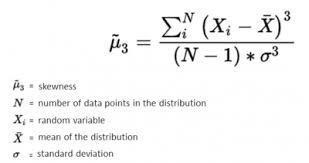


In [140]:
# write function to calc the skewness of each feature
#Note  N = train_data.shape[0]  (rows count)
def calc_skew(df):
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    n = df.shape[0]
    skewed = {}
    
    for col in num_cols:
        mean = df[col].mean()
        std = df[col].std()
        
        if std == 0:
            skewed[col] = 0
            continue
        
        skewness = ((df[col]-mean)/std).pow(3).sum()/n
        skewed[col] = skewness
        
    return skewed
calc_skew(df)

{'MSSubClass': 1.413192463972079,
 'LotFrontage': 2.364870859117684,
 'LotArea': 12.093958438954582,
 'OverallQual': 0.2556043890549157,
 'OverallCond': 0.7143644271509849,
 'YearBuilt': -0.6322157008748649,
 'YearRemodAdd': -0.5283845368228982,
 'MasVnrArea': 2.647815517338829,
 'BsmtFinSF1': 1.6930303098820882,
 'BsmtFinSF2': 4.189300704990003,
 'BsmtUnfSF': 0.925961160372526,
 '1stFlrSF': 1.399511058502756,
 '2ndFlrSF': 0.7935874247032482,
 'LowQualFinSF': 8.848012163864063,
 'GrLivArea': 1.3860000451415242,
 'BsmtFullBath': 0.5621554331880257,
 'BsmtHalfBath': 4.015197309090702,
 'FullBath': 0.041003918162147185,
 'HalfBath': 0.6434574223317239,
 'BedroomAbvGr': 0.18901533654041902,
 'KitchenAbvGr': 5.219018603351914,
 'Fireplaces': 0.629926236277215,
 'GarageCars': -0.31646324954754607,
 'WoodDeckSF': 1.5142964840532933,
 'OpenPorchSF': 2.3626610419479452,
 'EnclosedPorch': 3.0975433628108173,
 '3SsnPorch': 10.356959881561554,
 'ScreenPorch': 4.03405963337583,
 'PoolArea': 14.5487

# Log Transformation
> X = log(1 + | X | )     
this is the equation 

In [141]:
# Features that have absolute skewness > 1 do for it Log tranformation 
skew = calc_skew(df)
log_features = []

for col, skew_val in skew.items():
    if abs(skew_val) > 1:
        min_val = df[col].min()
        
        if min_val <= 0:
            df[col] = np.log1p(df[col]-min_val+1)
        else:
            df[col] = np.log1p(df[col])
            
        log_features.append(col)

print("Features log_Transformed :")
for feature in log_features:
    print(feature)

Features log_Transformed :
MSSubClass
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
1stFlrSF
LowQualFinSF
GrLivArea
BsmtHalfBath
KitchenAbvGr
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SalePrice


# Transform categorical features 

In [142]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'Neighborhood','FireplaceQu']

In [143]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def preprocess(df, nominal_cats):
    # OneHot Encoding on nominal
    if ordinal_cols:
        for col in ordinal_cols:
            if col in df.columns:
                le = LabelEncoder()
                df[col] = df[col].fillna("None")
                df[col] = le.fit_transform(df[col])
    
    nominal_cols = [col for col in nominal_cats if col in df.columns]
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
    
    return df

# Transform Numerical features 
> I want you apply only Min-Max Scaling for all numerical columns

In [144]:
from sklearn.preprocessing import MinMaxScaler

# write code here 
def scale_numerical(df):
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    scaler = MinMaxScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df


In [145]:
# print Your final data frame here 
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.110874,RL,4.189655,9.042040,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0.693147,0.693147,0.693147,0.693147,0.693147,2,2008,WD,Normal,12.247699
1,3.044522,RL,4.394449,9.169623,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0.693147,0.693147,0.693147,0.693147,0.693147,5,2007,WD,Normal,12.109016
2,4.110874,RL,4.234107,9.328212,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0.693147,0.693147,0.693147,0.693147,0.693147,9,2008,WD,Normal,12.317171
3,4.262680,RL,4.110874,9.164401,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,5.613128,0.693147,0.693147,0.693147,0.693147,2,2006,WD,Abnorml,11.849405
4,4.110874,RL,4.442651,9.565284,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0.693147,0.693147,0.693147,0.693147,0.693147,12,2008,WD,Normal,12.429220
